<a href="https://colab.research.google.com/github/sowmya-0201/Churn_Analysis/blob/main/Churn_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset

customer_churn = pd.read_csv('/content/Churn_Modelling_EDA.csv')

#Show first 5 rows to preview the data
customer_churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Columns present in dataset
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
#Basic info about the dataset. Check data types and null counts
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Statistical summary of numeric columns
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data Cleaning and Preparation

In [6]:
#Check for missing values
customer_churn.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
#Checking for duplicate values
customer_churn.duplicated().sum()

np.int64(0)

In [8]:
#checking for blanks in TotalCharges column
customer_churn[customer_churn['TotalCharges'].str.strip() == '']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
#Converting SeniorCitizen column from 1/0 to 'Yes'/'No'
customer_churn['SeniorCitizen'] = customer_churn['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

In [10]:
#Converting TotalCharges column from String to Numeric, forcing errors to NaN
customer_churn['TotalCharges'] = pd.to_numeric(customer_churn['TotalCharges'], errors = 'coerce')

In [11]:
#Checking for missing values
customer_churn.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
#Checking percentage of missing values per column
(customer_churn.isnull().sum()/ len(customer_churn) * 100).sort_values(ascending=False)

,0
TotalCharges,0.156183
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
customerID,0.000000
Dependents,0.000000
tenure,0.000000
MultipleLines,0.000000
PhoneService,0.000000
OnlineSecurity,0.000000


In [13]:
missing_data = pd.DataFrame((customer_churn.isnull().sum()/ len(customer_churn) * 100)).reset_index()
missing_data.rename({0:'missing_percent'}, axis = 1, inplace = True)

<Axes: title={'center': 'Percentage of Missing Values'}, xlabel='index', ylabel='missing_percent'>

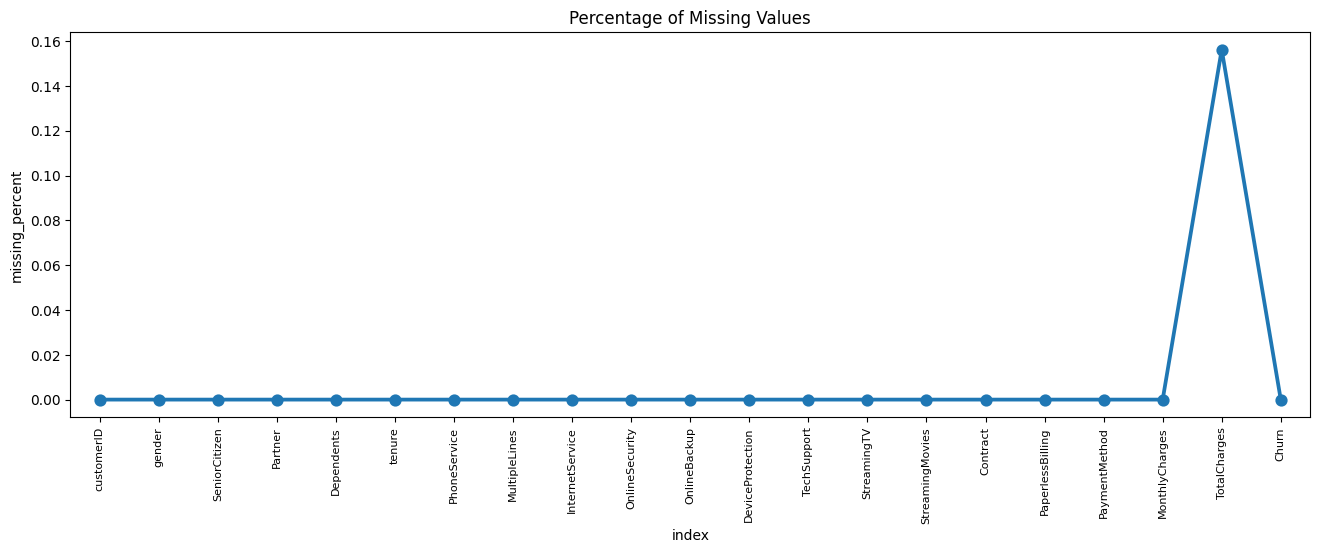

In [14]:
#Pointplot to represent missing data to get more visually clarity
plt.figure(figsize = (16, 5))
plt.xticks(rotation = 90, fontsize = 8)
plt.title("Percentage of Missing Values")
sns.pointplot(data = missing_data, x = 'index', y = 'missing_percent')

In [15]:
#Filled the NULL values present in TotalCharges column with median value
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].fillna(customer_churn['TotalCharges'].median()) # We can use inplace = TRUE instead of using =

In [16]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Detecting Outliers

In [17]:
customer_churn.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [18]:
#Selecting only numeric columns from our dataset
numeric_cols = customer_churn.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

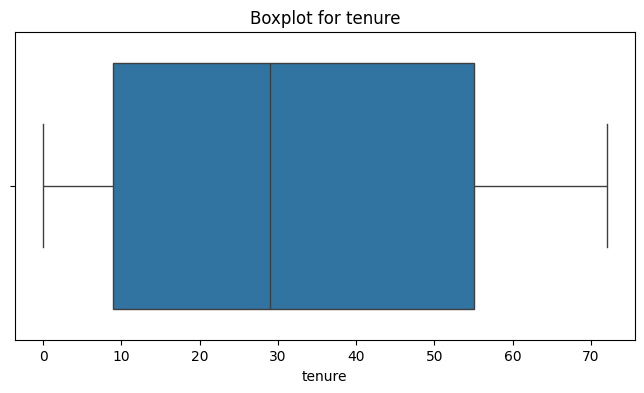

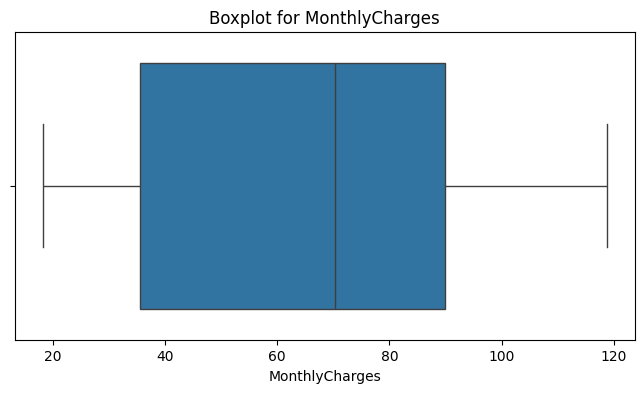

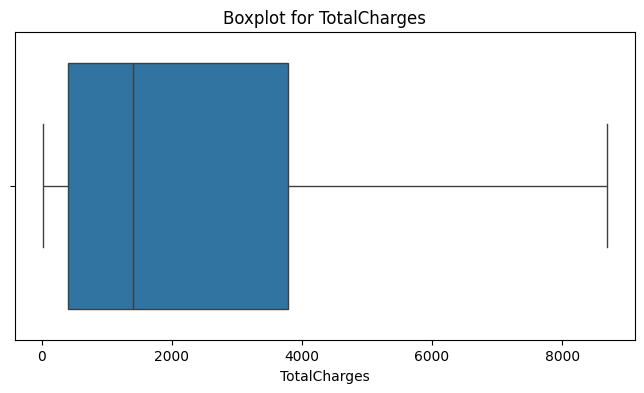

In [19]:
#visual check for outliers using boxplot
for col in numeric_cols:
  plt.figure(figsize = (8,4))
  sns.boxplot(x = customer_churn[col])
  plt.title(f'Boxplot for {col}')
  plt.show()

In [20]:
#detecting outliers for all the numeric columns
for col in numeric_cols:
  Q1 = customer_churn[col].quantile(0.25)
  Q3 = customer_churn[col].quantile(0.75)
  IQR = Q3 - Q1
  lowerlimit = Q1 - 3*IQR
  upperlimit = Q3 + 3*IQR
  outliers = customer_churn[(customer_churn[col] < lowerlimit) | (customer_churn[col] > upperlimit)]
  print(f"{col} - Outliers count: {len(outliers)}")

tenure - Outliers count: 0
MonthlyCharges - Outliers count: 0
TotalCharges - Outliers count: 0


#Univarient Analysis

In [21]:
# Selecting only categorical columns form the dataset
categorical_cols = customer_churn.select_dtypes('object').columns
categorical_cols = [col for col in categorical_cols if col not in ['customerID', 'Churn']]

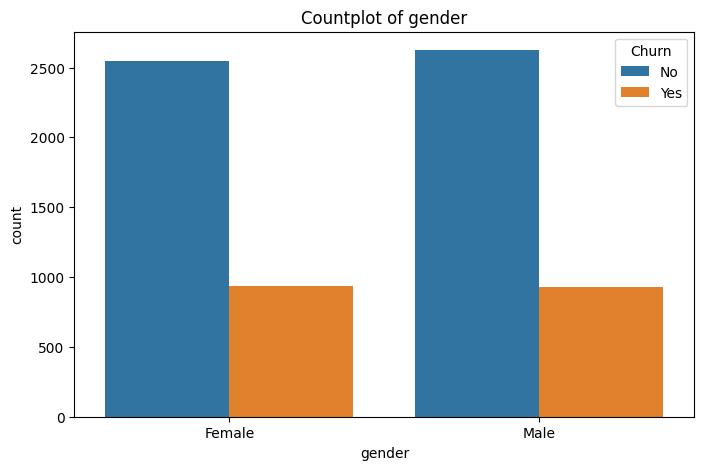

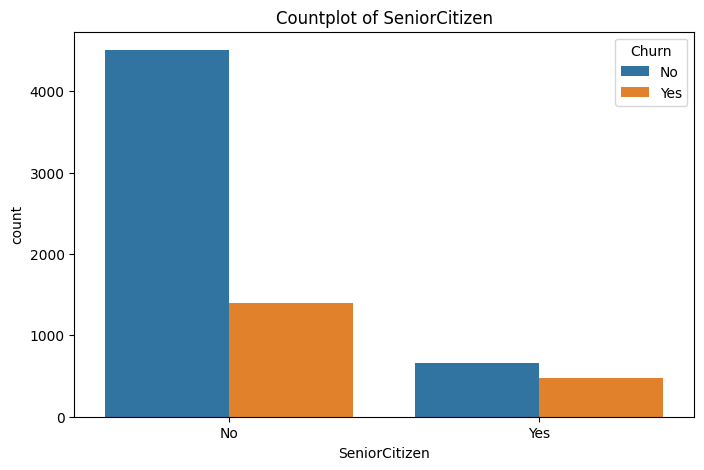

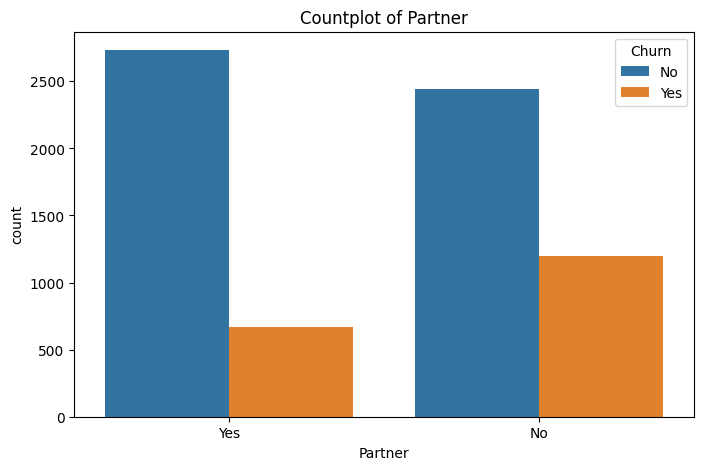

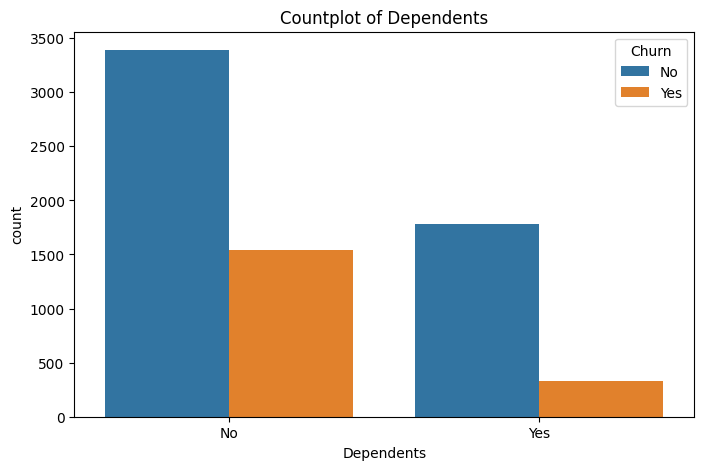

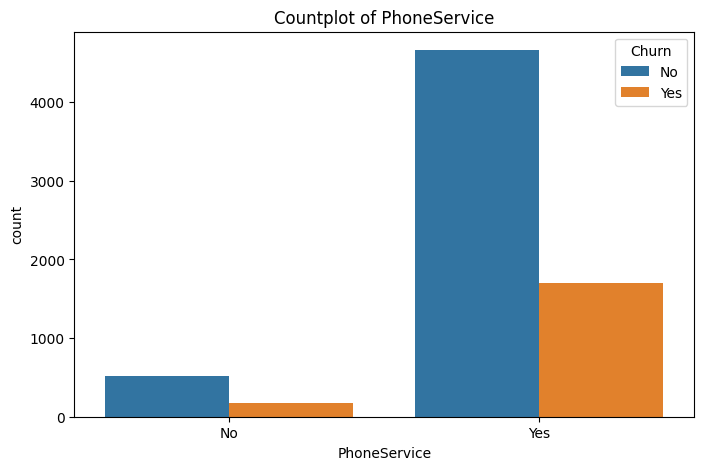

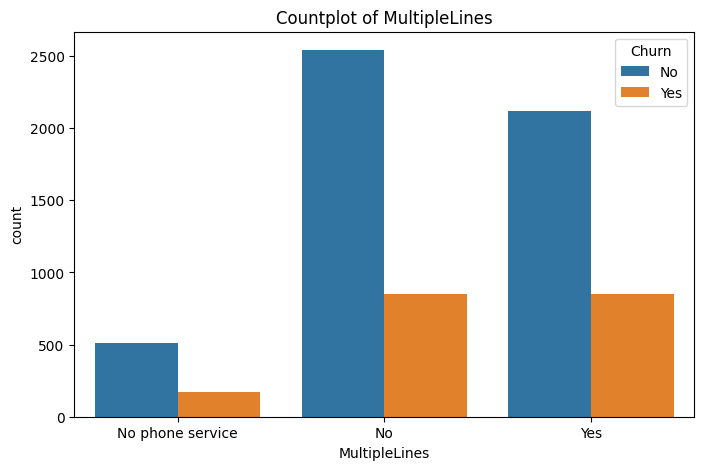

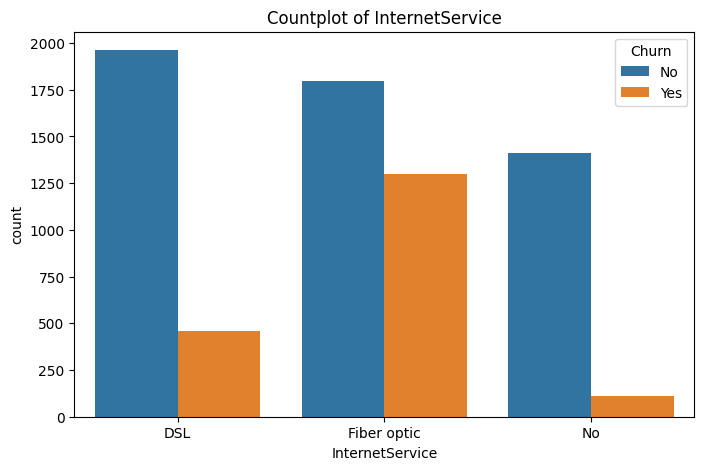

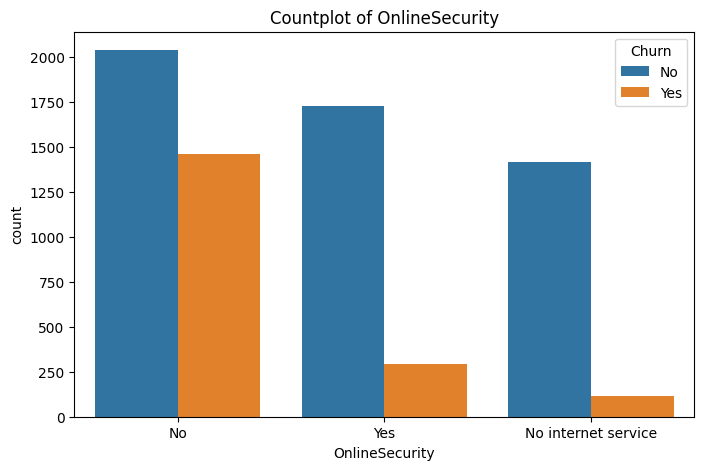

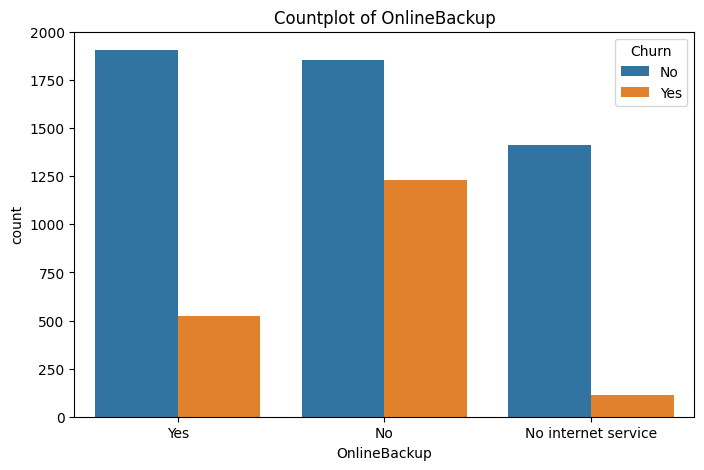

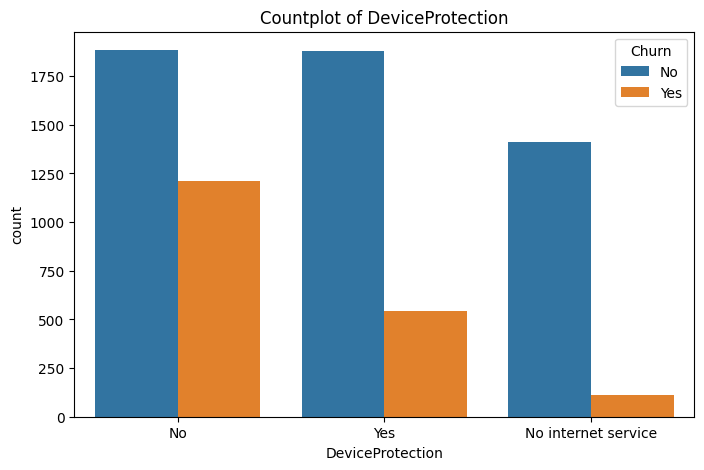

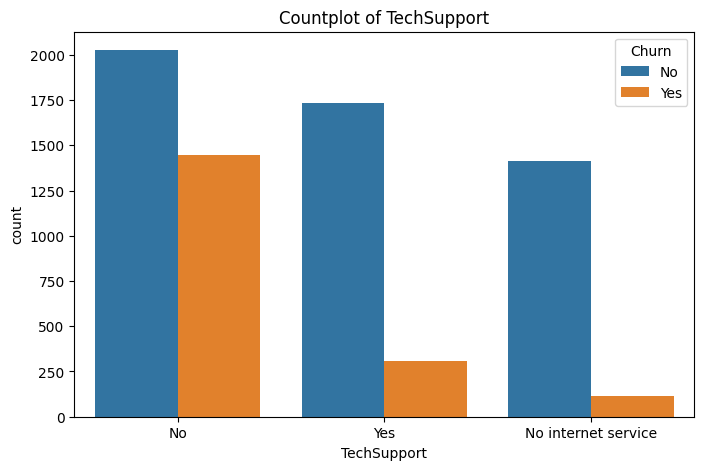

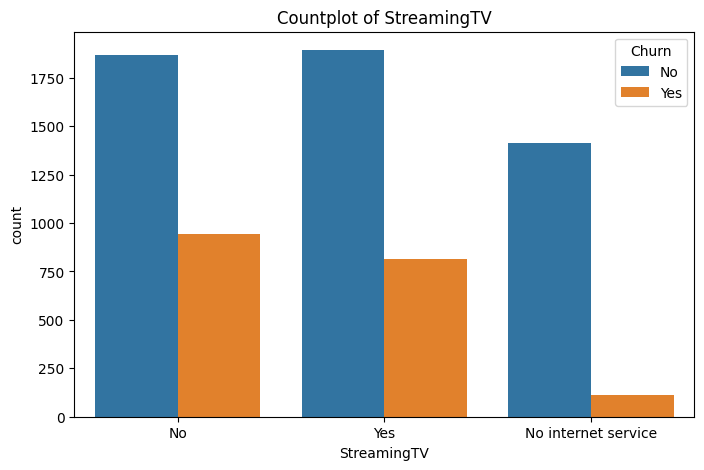

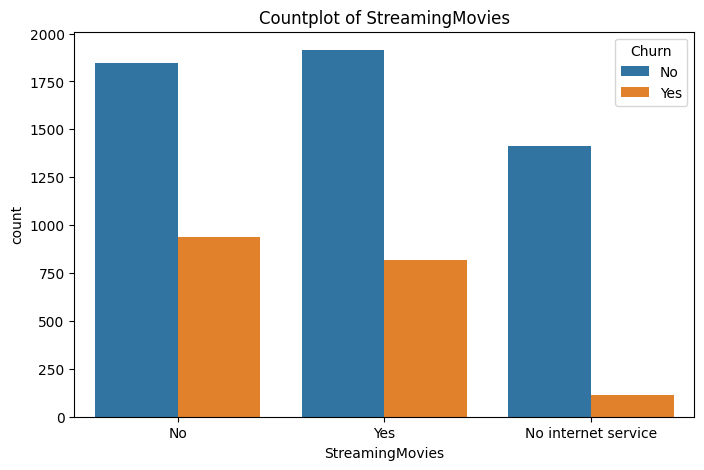

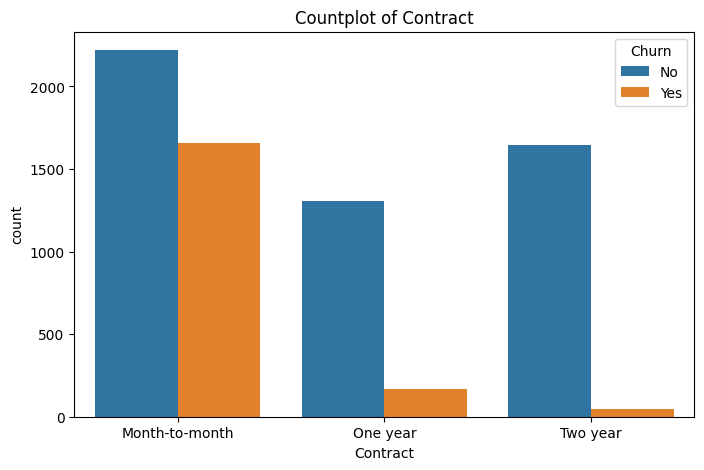

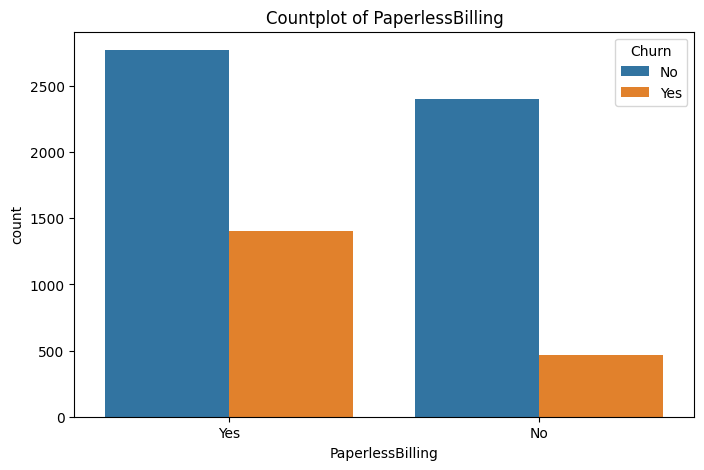

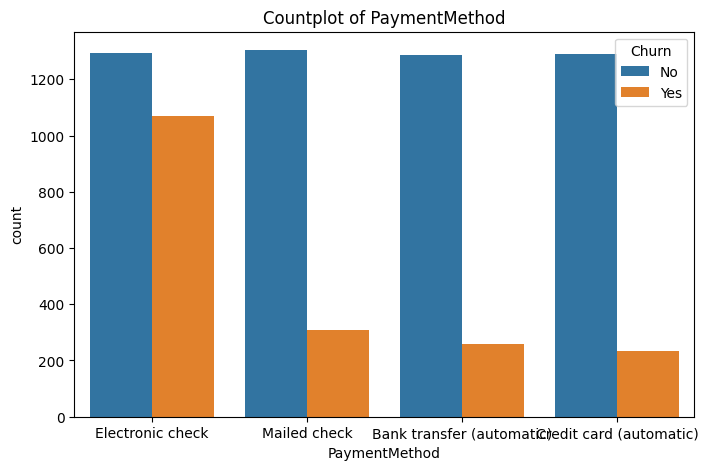

In [22]:
#plotting the graph for every categorical column
for col in categorical_cols:
  plt.figure(figsize = (8,5))
  sns.countplot(data = customer_churn, x = customer_churn[col], hue = 'Churn')
  plt.title(f'Countplot of {col}')
  plt.show()

Key Findings from Churn Analysis:
Senior Citizens: Around 37.5% of senior citizens churned, compared to 23.07% of non-senior citizens. This indicates that while churn is present across both groups, senior citizens show a slightly higher likelihood of churning.

Partner Status: Customers without partners have a noticeably higher churn rate compared to those with partners. This suggests that individuals without a partner are more prone to leaving the service.

Dependents: Similarly, customers without dependents are more likely to churn. Those who have dependents show a significantly lower churn rate.

Business Recommendation:
Focus retention efforts on solo customers — those without partners and dependents — as they are at a higher risk of churning. Tailored offers, personalized plans, or loyalty incentives targeting this segment could help improve customer retention.

Phone Service
From the plot, we observe that churn exists among both customers who subscribed to phone services and those who did not. However, there is still a significant count of churn among phone service users, suggesting that simply offering this service doesn't guarantee retention. This could indicate that some customers are dissatisfied with the phone service quality or do not find enough value in it. To improve retention, we may need to review service quality and consider bundling better offers with phone services.





#Numerical Analysis

In [23]:
numerical_cols = customer_churn.select_dtypes(['float64', 'int64']).columns.tolist()

In [24]:
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

<ipython-input-25-4adc8fb2f3ea>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = customer_churn, x = 'tenure', shade = True, color = 'purple')


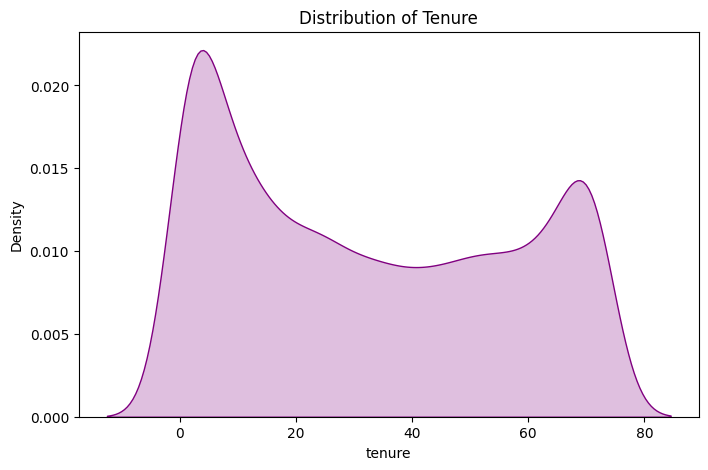

In [25]:
# Distribution Plot (KDE) of tenure
plt.figure(figsize=(8, 5))
sns.kdeplot(data = customer_churn, x = 'tenure', shade = True, color = 'purple')
plt.title('Distribution of Tenure')
plt.show()

In [26]:
numeric_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

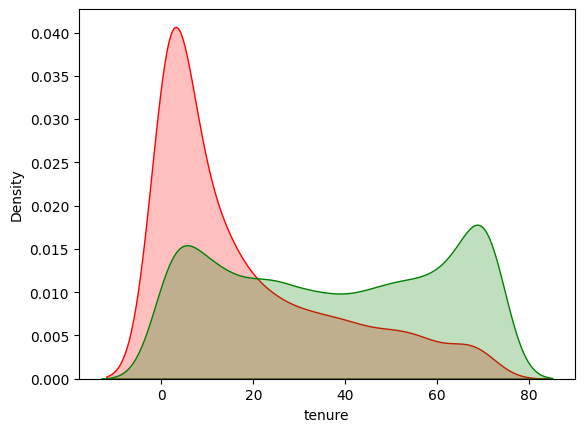

In [27]:
sns.kdeplot(data = customer_churn[customer_churn['Churn'] == 'Yes'], x = 'tenure', fill = True, color = 'Red')
sns.kdeplot(data = customer_churn[customer_churn['Churn'] == 'No'], x = 'tenure', fill = True, color = 'Green')
plt.show()

Churners:

Higher count at low tenure → meaning new customers are more likely to churn.

As tenure increases, the churn rate drops → suggesting that once people stay longer, they are less likely to leave.

This implies that contract length or tenure builds loyalty.

Non-Churners:

Their tenure distribution is more evenly spread — meaning long-time users tend to stay, and even some newer users didn’t churn.

#Analyzing Monthly Charges

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

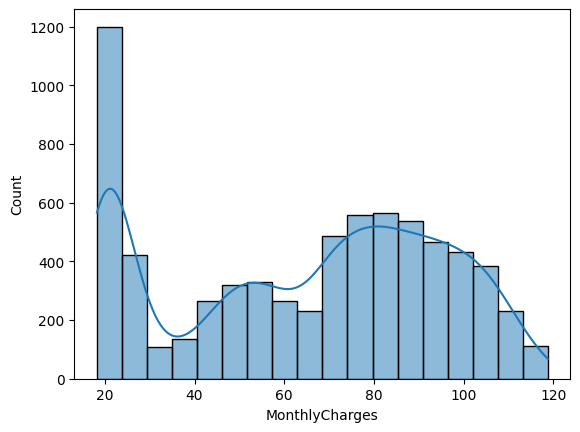

In [28]:
sns.histplot(data = customer_churn, x = 'MonthlyCharges', kde=True)
# Most customers are on cheaper plans, but a few are paying much higher — stretching the curve to the right

In [29]:
customer_churn['MonthlyCharges'].skew()

np.float64(-0.22052443394398033)

skewness is -0.22
It is a bimodal curve which means it has two peaks
Though from the graph we can see it is slightly right skewed. But the value we got is -0.22 which is slightly left skewed. This mismatch is we have a lot of customers paying lower charges(20's) this pulled the mean downwards resulting in negative skew. The right side tail (80 - 120) is not long enough to pull the skew value to positive

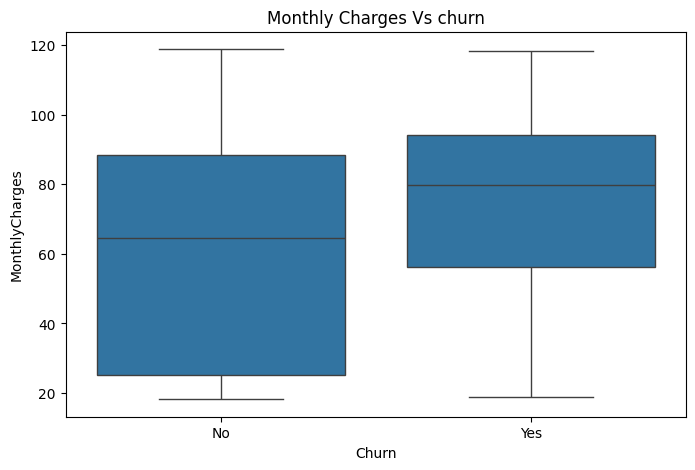

In [30]:
plt.figure(figsize = (8,5))
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = customer_churn)
plt.title('Monthly Charges Vs churn')
plt.show()

Customers who churned tend to have higher monthly charges, suggesting a possible link between billing amount and churn likelihood. This suggests that pricing sensitivity plays a role in churn. Customers with higher monthly bills might be more likely to leave, possibly due to better offers from competitors or perceived lack of value

<Axes: xlabel='TotalCharges', ylabel='Density'>

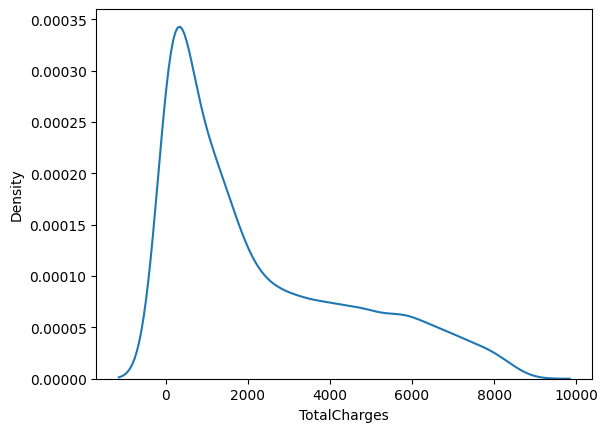

In [31]:
sns.kdeplot(data = customer_churn, x = 'TotalCharges')

<Axes: xlabel='TotalCharges', ylabel='Count'>

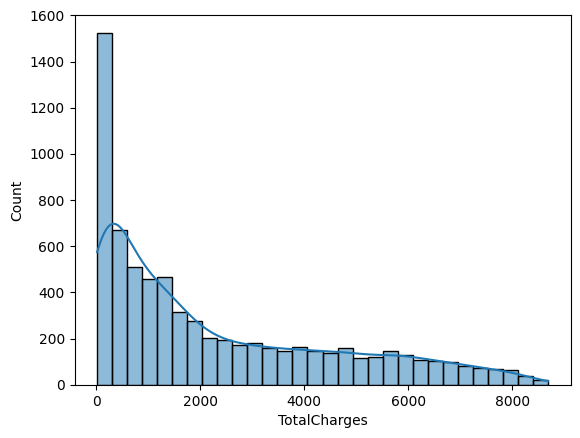

In [32]:
sns.histplot(data = customer_churn, x = 'TotalCharges', kde = True, bins = 30)

In [33]:
customer_churn['TotalCharges'].skew()

np.float64(0.9637890936414893)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

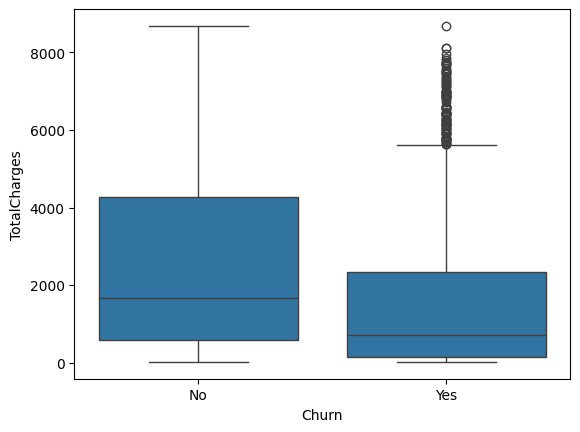

In [34]:
sns.boxplot(data = customer_churn, x = 'Churn', y = 'TotalCharges')

Churned customers tend to have higher monthly charges, suggesting cost sensitivity. However, their total charges are generally lower, indicating that many churned early before accumulating large bills. Outliers in total charges among churners show that some high-paying long-term customers also left.

#Bi Varient Analysis

<Axes: xlabel='tenure', ylabel='TotalCharges'>

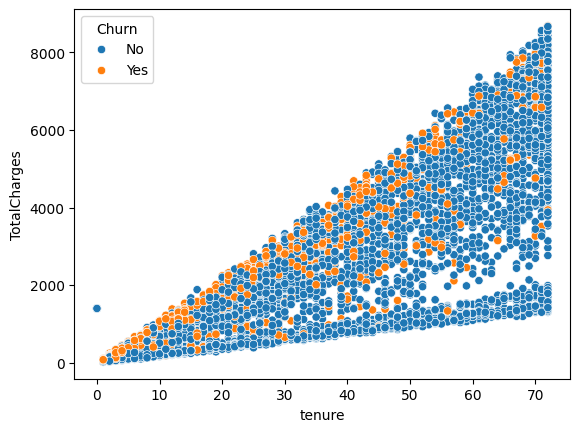

In [35]:
sns.scatterplot(data = customer_churn, y = 'TotalCharges', x = 'tenure', hue = 'Churn')

Most churners are clustered at low tenure, meaning they leave early and thus have lower total charges. However, a smaller group of churners with high tenure shows high total charges. In general, churners tend to pay higher monthly charges, but total charges stay lower because they exit early. Non-churners span a wide range, including both low and high total charges, as they stay longer.

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

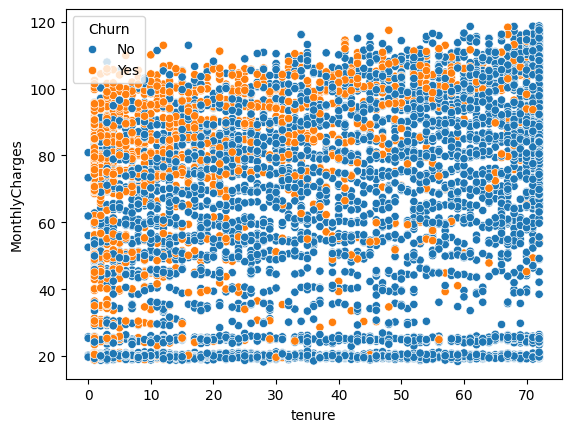

In [36]:
sns.scatterplot(data = customer_churn, x = 'tenure', y = 'MonthlyCharges', hue = 'Churn')

Most churners are clustered at low tenure and are paying higher monthly charges.

This suggests that new customers who are charged more per month are more likely to churn early.

In contrast, customers with longer tenure (stayed longer) show a broader spread but churn less frequently — even if their monthly charges are high or low.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

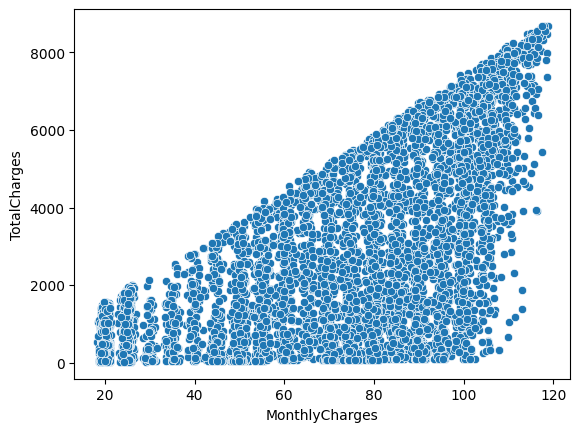

In [38]:
sns.scatterplot(data = customer_churn, x = 'MonthlyCharges', y = 'TotalCharges')

if someone has high monthly charges and stays longer, their Total Charges will accumulate and show this upward trend.

total and monthly charges are correlated — but churn behavior depends not just on payment amount but also on tenure, contract type, etc.

# Numeric Correlation

In [67]:
numeric_corr = customer_churn.select_dtypes(['int64','float64']) #inorder to take multiple datatypes we need to include them in list

In [68]:
numeric_corr

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [70]:
numeric_corr.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000
